In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('imdb_movies_shows.csv')

In [3]:
df

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [4]:
df.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5806 non-null   object 
 2   release_year          5806 non-null   int64  
 3   age_certification     3196 non-null   object 
 4   runtime               5806 non-null   int64  
 5   genres                5806 non-null   object 
 6   production_countries  5806 non-null   object 
 7   seasons               2047 non-null   float64
 8   imdb_id               5362 non-null   object 
 9   imdb_score            5283 non-null   float64
 10  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 499.1+ KB


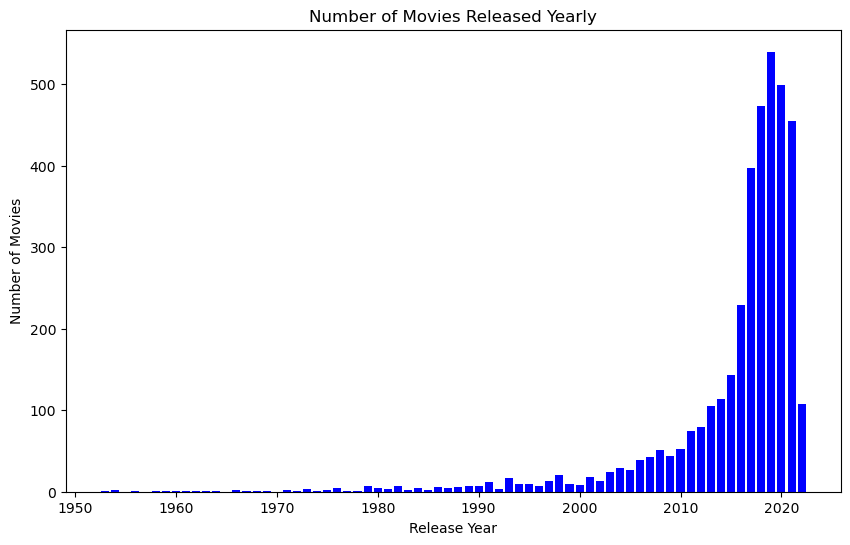

In [6]:
import matplotlib.pyplot as plt

# Filter out the movies
movies = df[df['type'] == 'MOVIE']

# Group by 'release_year' and count the number of movies for each year
yearly_movies = movies['release_year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(yearly_movies.index, yearly_movies.values, color='blue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Yearly')
plt.show()


In [7]:
# df['genres'] = df['genres'].astype(str)
# df['genres'] = df['genres'].str.strip('[]').str.split(',')


In [8]:
# Assuming 'df' is your DataFrame and 'genres' is the column you want to count values from
unique_values = df['genres'].value_counts()
print(unique_values)

genres
['comedy']                                            510
['drama']                                             350
['documentation']                                     320
['comedy', 'drama']                                   141
['drama', 'comedy']                                   128
                                                     ... 
['drama', 'family', 'comedy', 'music']                  1
['drama', 'thriller', 'western']                        1
['comedy', 'thriller', 'drama', 'action', 'crime']      1
['romance', 'drama', 'history', 'european']             1
['family', 'comedy', 'animation']                       1
Name: count, Length: 1626, dtype: int64


In [9]:
# Ensure 'genres' column contains strings
df['genres'] = df['genres'].astype(str)

# Split the genres
split_genres = df['genres'].str.strip('[]').str.split(', ', expand=True)

# Print the result
print(split_genres)


                    0                1            2     3     4     5     6  \
0     'documentation'             None         None  None  None  None  None   
1             'crime'          'drama'         None  None  None  None  None   
2            'comedy'        'fantasy'         None  None  None  None  None   
3            'comedy'             None         None  None  None  None  None   
4            'horror'             None         None  None  None  None  None   
...               ...              ...          ...   ...   ...   ...   ...   
5801        'romance'          'drama'         None  None  None  None  None   
5802          'music'  'documentation'         None  None  None  None  None   
5803         'family'          'drama'         None  None  None  None  None   
5804         'action'       'thriller'         None  None  None  None  None   
5805         'family'         'comedy'  'animation'  None  None  None  None   

         7     8  
0     None  None  
1     None  N

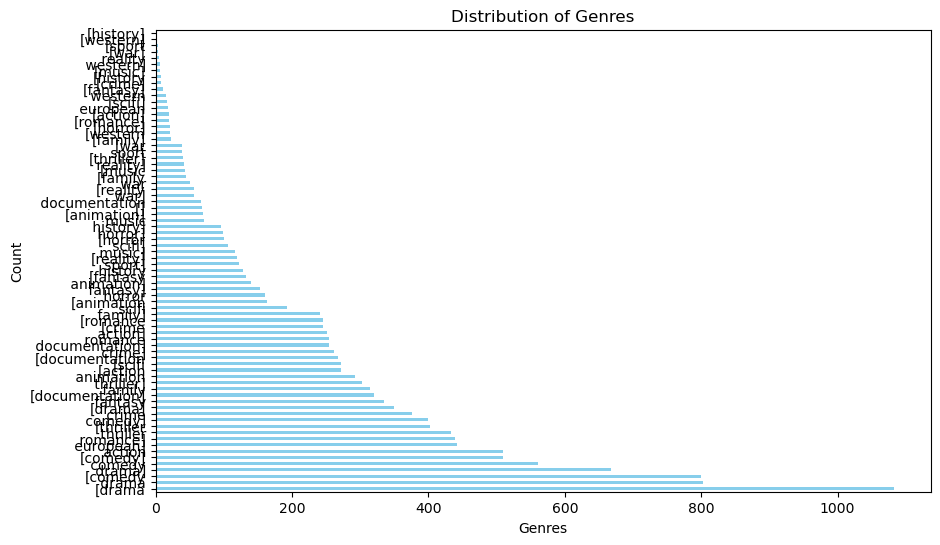

In [10]:
# Convert the string representation of a list to an actual list
df['genres'] = df['genres'].str.replace("'", "").str.split(',')

# Count the occurrences of each genre
genre_counts = pd.Series(df['genres'].tolist()).explode().value_counts()

# Plot the bar chart
plt.figure(figsize = (10, 6))
genre_counts.plot(kind = 'barh', color= 'skyblue')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


In [11]:
df.isnull().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [12]:
# Reformat the generes columns so they are seperated by commas

# Task to do on the Data set today:
1. Change genres and country features to be commma seprated values.
2. Formart countris values to be chaarters
3. Change the [] values in genres and production_countries to "NO_GENRE" and "NO_COUNTRY"
4. Check the movie without the title.
5. Drop movies without imbd_id

6.group movie by type

7. TV-MA, R, NC-17 = Adult.

8.'PG', 'TV-14', 'G', 'PG-13', 'TV-PG' = Requires Supervision

9.'TV-Y', 'TV-G', 'TV-Y7' = Good For Children
10.NaN = Not Rated

In [13]:
# Define a function the group the films base on the Age Ceritication Column:

def age_group(age_cert):
   if age_cert in ['TV-MA', 'R', 'NC-17']:
       return 'Adult'
   elif age_cert in ['PG', 'TV-14', 'G', 'PG-13', 'TV-PG']:
       return 'Requires Supervision'
   elif age_cert in ['TV-Y', 'TV-G', 'TV-Y7']:
       return 'Good For Children'
   else:
       return "Not Rated"



In [14]:
df.loc[:, "age_group_rating"] = df["age_certification"].apply(age_group)


In [15]:
df["age_group_rating"].value_counts()

age_group_rating
Not Rated               2610
Requires Supervision    1473
Adult                   1430
Good For Children        293
Name: count, dtype: int64

In [26]:
children_movies = df["age_group_rating"] == "Good For Children"

In [27]:
children_movies_df = df[children_movies]

In [28]:
print(children_movies_df.columns)


Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'age_group_rating'],
      dtype='object')


In [29]:
children_movies_df.get('genres', default=pd.Series(dtype='float64'))


57      [[family,  comedy,  music,  action,  animation...
60                          [[comedy,  romance,  family]]
64                                             [[family]]
66      [[comedy,  animation,  family,  crime,  europe...
67      [[comedy,  family,  scifi,  animation,  europe...
                              ...                        
5550                                          [[reality]]
5586             [[comedy,  family,  action,  animation]]
5604                      [[comedy,  family,  animation]]
5695                      [[action,  animation,  family]]
5765                                                 [[]]
Name: genres, Length: 293, dtype: object

In [30]:
children_movies_df.columns = children_movies_df.columns.str.strip()


In [31]:
children_movies_df[children_movies_df.genres.str.contains("animation")]

KeyError: "None of [Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n       ...\n       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n      dtype='float64', length=293)] are in the [columns]"

In [ ]:
df['production_countries'] = df['production_countries'].apply(lambda x: ', '.join(x))

In [ ]:
df

In [ ]:
df['genres'] = df['genres'].apply(lambda x: ', '.join(x))

In [ ]:
df

In [ ]:
df

In [ ]:
#df['genres'] = df['genres'].apply(lambda x: ', '.join(x))


In [ ]:
df

In [ ]:
df.age_certification.unique()

In [ ]:
df.type.unique()

In [ ]:
df

In [ ]:
blank_genre_mask = df["genres"] == "[]"
df.loc[blank_genre_mask, "genres"] = "NO_GENRE"

In [ ]:
df.genres.sample(50)

In [ ]:
#Find the observation with the Lebanon and replace it with LB

In [ ]:
df.production_countries.value_counts()

In [ ]:
df.production_countries.unique()

In [ ]:
df.iloc[651]

In [ ]:
df[df.production_countries.str.contains("Leb")]

In [ ]:
leb_mask = df.production_countries.str.contains("Leb")

new_lb_values = df[leb_mask]["production_countries"].str.replace('Lebanon', 'LB')

df.loc[leb_mask, "production_countries"] = new_lb_values

In [ ]:
df

In [ ]:
# df.title.value_counts()
df['title']

In [ ]:
leb_title = df.title.str.contains("")

In [ ]:
leb_title

In [ ]:
df['title'].isnull().sum()

In [ ]:
df.iloc[649]

In [ ]:
df[df["title"].isnull()]

In [ ]:
#Drop the element without title

df = df.dropna(subset=['title'])


In [ ]:
df[df["title"].isnull()]

In [ ]:
 df[df["imdb_id"].isnull()].count()

In [ ]:
#Drop the element without title

df = df.dropna(subset=['imdb_id'])


In [ ]:
 df[df["imdb_id"].isnull()].count()

In [ ]:
# # Define a function the group the films base on the Age Ceritication Column:

# def age_group(age_cert):
#    if age_cert in ['TV-MA', 'R', 'NC-17']:
#        return 'Adult'
#    elif age_cert in ['PG', 'TV-14', 'G', 'PG-13', 'TV-PG']:
#        return 'Requires Supervision'
#    elif age_cert in ['TV-Y', 'TV-G', 'TV-Y7']:
#        return 'Good For Children'
#    else:
#        return "Not Rated"


In [20]:
df.loc[:, "age_group_rating"] = df["age_certification"].apply(age_group)



In [21]:
df["age_group_rating"].value_counts()

age_group_rating
Not Rated               2610
Requires Supervision    1473
Adult                   1430
Good For Children        293
Name: count, dtype: int64

In [22]:
children_movies = df["age_group_rating"] == "Good For Children"

In [23]:
children_movies_df = df[children_movies]

In [ ]:
# children_movies_df[children_movies_df.genres.str.contains("animation")]

# Assignment:

1.Find number of movies relased in each decade
from 1945, show a line chart to display this.


2. show the distirbution of run time features using an appropriate chart.


3. show barchart for movie genres.


4. show barchart for movie genres for children movies.


5. which of the genres have the highest runtime on the overal datatset and for each age group.

In [ ]:
c = 0
for i in range(3):
    for j in range(3):
        if i == j:
            c = c + 1
            

In [ ]:
print(c)